<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Citra Hasil Dilasi')

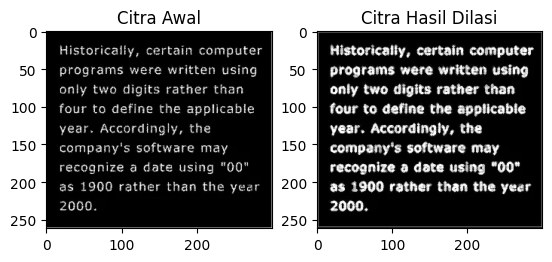

In [34]:
morphology = cv.imread('/content/drive/MyDrive/PCVK/09/morphology.png',0)

m, n = morphology.shape

imgDilasi= np.zeros((m, n), dtype=np.uint8)

kernel = np.array([[0,1,0], [1,1,1],[0,1,0]])
constant1 = 1

for i in range(constant1, m-constant1):
    for j in range(constant1, n-constant1):
        temp = morphology[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
        product = temp * kernel
        imgDilasi[i,j] = np.max(product)


plt.subplot(121),plt.imshow(morphology, cmap = 'gray')
plt.title('Citra Awal')
plt.subplot(122),plt.imshow(imgDilasi, cmap = 'gray')
plt.title('Citra Hasil Dilasi')